In [48]:

# importing module to read dataset

import pandas as pd

# importing model to find the sentiment Expressions 

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# initialize the model

analyser = SentimentIntensityAnalyzer()


In [49]:

# reading the dataset

df = pd.read_json('reviewSelected100.json',lines=True)


In [50]:

# converting the dataset text column to type text

df["text"].astype(str)

# displaying the head of data 

df[['review_id','text']].head()


,review_id,text
0,8aoJJdKEO3ypoZNszpPu7Q,We had my Mother's Birthday Party here on 10/2...
1,J5NOCLdhuhor7USRhtYZ8w,Good Korean grill near Eaton Centre. The marin...
2,PXiLWAYRt3xnHaJ8MB4rzw,Was recommended to try this place by few peopl...
3,VrLarvxZYJm74yAqtpe9PQ,Ambience: Would not expect something this nice...
4,C1CUpidlVFprUCkApqzCmA,Absolutely the WORST pool company that I have ...


In [51]:

# checking dataset info 

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15300 entries, 0 to 15299
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_id    15300 non-null  object        
 1   user_id      15300 non-null  object        
 2   business_id  15300 non-null  object        
 3   stars        15300 non-null  int64         
 4   useful       15300 non-null  int64         
 5   funny        15300 non-null  int64         
 6   cool         15300 non-null  int64         
 7   text         15300 non-null  object        
 8   date         15300 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1.1+ MB


In [52]:

# implement the sentiment expression model

def fetch_sentiment(text):
    
    # applying the model on each review text and get it's expression score
    
    polarity_scores = analyser.polarity_scores(text.lower())
    
    # if the expression score > 0.05 then assign postive expression
    
    if polarity_scores['compound'] >= 0.05:
        
        # send back results
        
        return 'Positive'
    
    # if the expression score < -0.05 then assign negitive expression
    
    elif polarity_scores['compound'] <= -0.05:
        
        # send back results
            
        return 'Negative '
    
    # if the expression score = 0 then assign neutral expression
    
    else:
        
        # send back results
        
        return 'Neutral'
    

In [53]:

# applying the model on each review text of dataset and assign to Expression

df["Expression"]= df["text"].apply(lambda x: fetch_sentiment(x))


In [54]:

# displaying the head of dataset

df[['review_id','text','Expression']].head()


,review_id,text,Expression
0,8aoJJdKEO3ypoZNszpPu7Q,We had my Mother's Birthday Party here on 10/2...,Positive
1,J5NOCLdhuhor7USRhtYZ8w,Good Korean grill near Eaton Centre. The marin...,Positive
2,PXiLWAYRt3xnHaJ8MB4rzw,Was recommended to try this place by few peopl...,Positive
3,VrLarvxZYJm74yAqtpe9PQ,Ambience: Would not expect something this nice...,Positive
4,C1CUpidlVFprUCkApqzCmA,Absolutely the WORST pool company that I have ...,Negative


<AxesSubplot:ylabel='Expression'>

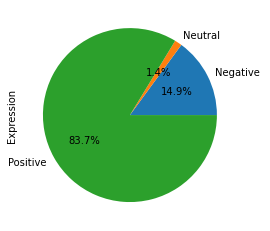

In [57]:
# displaying results in pie chart
df.groupby('Expression')['Expression'].count().plot(kind = 'pie', autopct='%1.1f%%')

In [56]:

# saving results back to a csv file

df.to_csv("Mining_Result.csv",index = False)

# saving results back to a json file

df.to_json("Mining_Result.json",orient='records')
